## Data Loading and Preprocessing

In [32]:
import pandas as pd
from sklearn.utils import shuffle
df = pd.read_csv('resources/dataset_kaggle.csv')
df = shuffle(df, random_state=42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
209,Heart Disease,Blood in stool,Bowel issues,Nausea,Constipation,Jaw pain,Fatigue,Itching,Irregular heartbeat,Diarrhea,Bloating,Swelling,Weakness,Difficulty swallowing,Numbness,Shortness of breath,Thickened skin,Gas
280,Rheumatoid Arthritis,Unexplained bleeding,Bowel issues,Stooped posture,Burning,Nausea,Nosebleeds,Increased mucus production,Vomiting,Chest discomfort,Diarrhea,Loss of height,Swelling,Itching,Tenderness,Bloating,Irritability,Shortness of breath
33,Bronchitis,Bowel issues,Soreness,Throbbing pain,Nosebleeds,Increased mucus production,Frequent urination,Chest discomfort,Slight fever,Vomiting,Swelling,Mucus production,Bone pain,Blisters,Shortness of breath,Anemia,Sore that doesn’t heal,Gas
210,Gout,Redness,Blood in stool,Inability to defecate,Bleeding mole,Nausea,Rapid pulse,Increased mucus production,Hard lumps,Constipation,Vomiting,Slight fever,Diarrhea,Bloating,Swelling,Tophi,Shortness of breath,Hunger
93,Bronchitis,Pneumonia,Nosebleeds,Hard lumps,Increased mucus production,Increased thirst,Belching,Chest discomfort,Vomiting,Diarrhea,Bloating,Bone fractures,Swelling,Tenderness,Irritability,Numbness,Shortness of breath,Sore that doesn’t heal


In [33]:
for col in df.columns[1:]:
    df[col] = df[col].str.replace('_', ' ')
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
209,Heart Disease,Blood in stool,Bowel issues,Nausea,Constipation,Jaw pain,Fatigue,Itching,Irregular heartbeat,Diarrhea,Bloating,Swelling,Weakness,Difficulty swallowing,Numbness,Shortness of breath,Thickened skin,Gas
280,Rheumatoid Arthritis,Unexplained bleeding,Bowel issues,Stooped posture,Burning,Nausea,Nosebleeds,Increased mucus production,Vomiting,Chest discomfort,Diarrhea,Loss of height,Swelling,Itching,Tenderness,Bloating,Irritability,Shortness of breath
33,Bronchitis,Bowel issues,Soreness,Throbbing pain,Nosebleeds,Increased mucus production,Frequent urination,Chest discomfort,Slight fever,Vomiting,Swelling,Mucus production,Bone pain,Blisters,Shortness of breath,Anemia,Sore that doesn’t heal,Gas
210,Gout,Redness,Blood in stool,Inability to defecate,Bleeding mole,Nausea,Rapid pulse,Increased mucus production,Hard lumps,Constipation,Vomiting,Slight fever,Diarrhea,Bloating,Swelling,Tophi,Shortness of breath,Hunger
93,Bronchitis,Pneumonia,Nosebleeds,Hard lumps,Increased mucus production,Increased thirst,Belching,Chest discomfort,Vomiting,Diarrhea,Bloating,Bone fractures,Swelling,Tenderness,Irritability,Numbness,Shortness of breath,Sore that doesn’t heal


In [36]:
df.shape

(400, 18)

## Exploratory Data Analysis (EDA)

In [10]:
import matplotlib.pyplot as plt

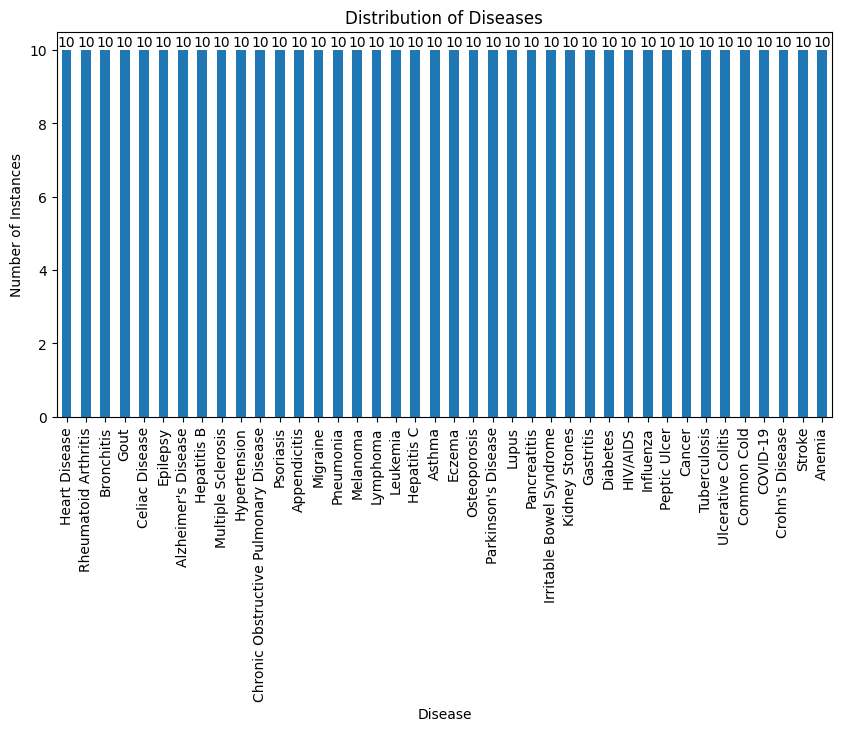

In [11]:
disease_distribution = df['Disease'].value_counts()

plt.figure(figsize=(10, 5))
disease_distribution.plot(kind='bar')
plt.title("Distribution of Diseases")
plt.xlabel("Disease")
plt.ylabel("Number of Instances")

for index, value in enumerate(disease_distribution):
    plt.text(index, value + 0.1, str(value), ha='center')

plt.show()

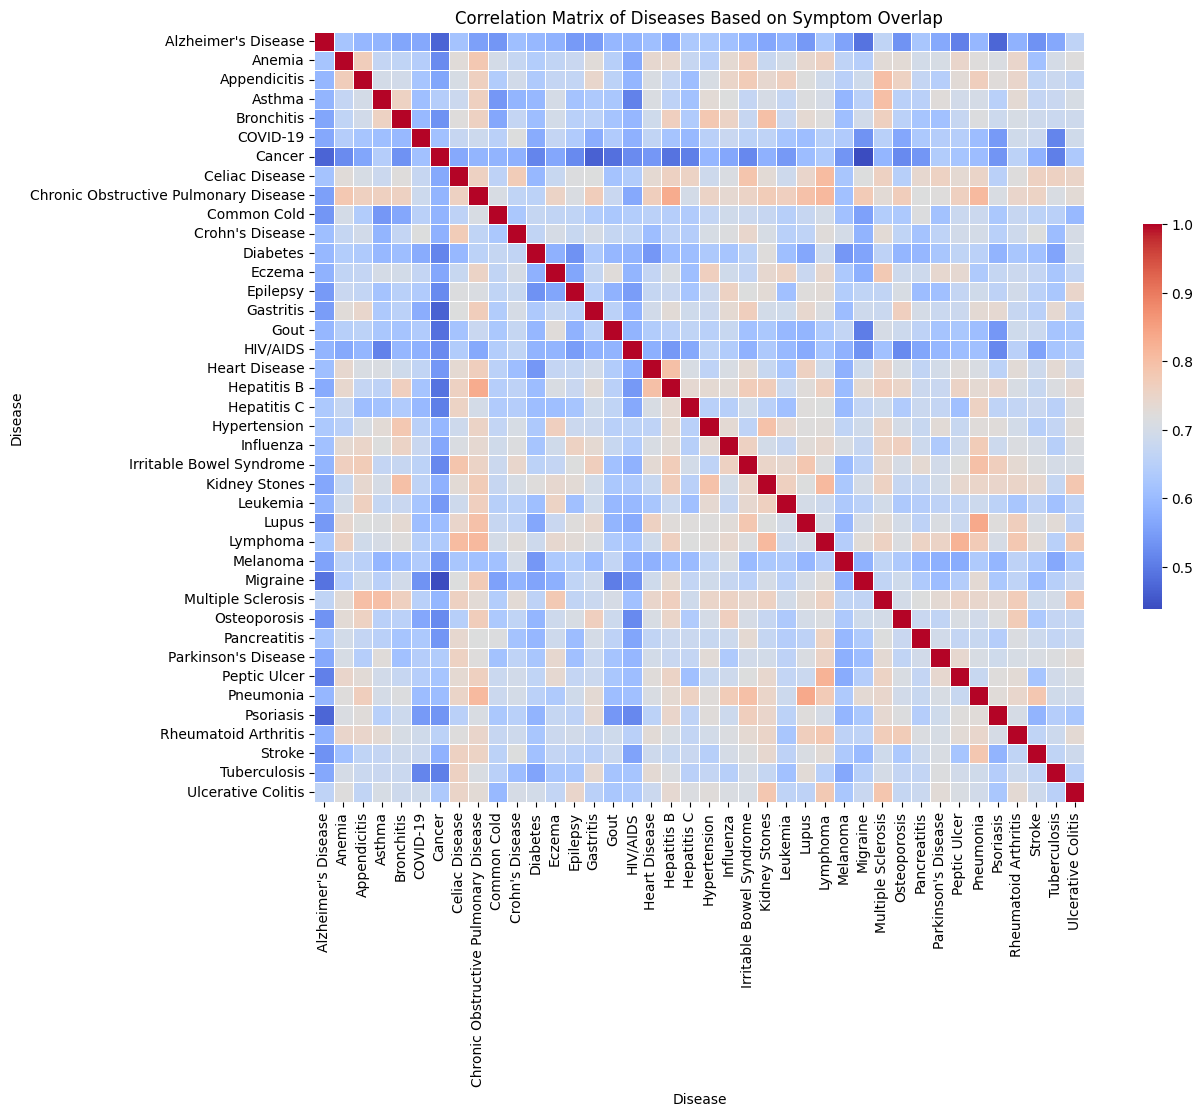

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
symptom_binary_matrix = pd.get_dummies(df.set_index('Disease').stack()).groupby(level=0).sum()

disease_correlation = symptom_binary_matrix.T.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(
    disease_correlation,
    annot=False,  
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .5}
)
plt.title("Correlation Matrix of Diseases Based on Symptom Overlap")
plt.show()


## Model Training and Evaluation



In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
symptom_columns = df.columns[1:]
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_symptoms = onehot_encoder.fit_transform(df[symptom_columns])

scaler = StandardScaler()
normalized_symptoms = scaler.fit_transform(encoded_symptoms)

encoded_df = pd.DataFrame(normalized_symptoms, columns=onehot_encoder.get_feature_names_out(symptom_columns))

preprocessed_df = pd.concat([df[['Disease']].reset_index(drop=True), encoded_df], axis=1)

preprocessed_df.head()

,Disease,Symptom_1_Aura,Symptom_1_Bleeding mole,Symptom_1_Blood in stool,Symptom_1_Bowel issues,Symptom_1_Burning,Symptom_1_Change in bowel habits,Symptom_1_Chest pain,Symptom_1_Difficulty sleeping,Symptom_1_Difficulty walking,...,Symptom_17_Pigment spread,Symptom_17_Shortness of breath,Symptom_17_Skin changes,Symptom_17_Sore that doesn’t heal,Symptom_17_Swollen lymph nodes,Symptom_17_Tenderness,Symptom_17_Thickened skin,Symptom_17_Tophi,Symptom_17_Vomiting,Symptom_17_Weakness
0,Leukemia,-0.086929,-0.100504,-0.319262,-0.217072,-0.100504,-0.070888,-0.050063,-0.112509,-0.050063,...,-0.050063,-0.43237,-0.050063,-0.468521,-0.100504,-0.050063,-0.217072,-0.070888,-0.050063,-0.050063
1,Melanoma,-0.086929,-0.100504,-0.319262,-0.217072,-0.100504,-0.070888,-0.050063,-0.112509,-0.050063,...,-0.050063,-0.43237,-0.050063,2.134375,-0.100504,-0.050063,-0.217072,-0.070888,-0.050063,-0.050063
2,Bronchitis,-0.086929,-0.100504,-0.319262,-0.217072,-0.100504,-0.070888,-0.050063,-0.112509,-0.050063,...,-0.050063,-0.43237,-0.050063,-0.468521,-0.100504,-0.050063,-0.217072,-0.070888,-0.050063,-0.050063
3,Cancer,-0.086929,-0.100504,-0.319262,-0.217072,-0.100504,-0.070888,-0.050063,-0.112509,-0.050063,...,-0.050063,-0.43237,-0.050063,-0.468521,-0.100504,-0.050063,4.606758,-0.070888,-0.050063,-0.050063
4,Cancer,-0.086929,-0.100504,-0.319262,-0.217072,-0.100504,-0.070888,-0.050063,-0.112509,-0.050063,...,-0.050063,-0.43237,-0.050063,2.134375,-0.100504,-0.050063,-0.217072,-0.070888,-0.050063,-0.050063


## Model Selection and Training

### Multi-Layer Perceptron (MLP)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [ ]:
onehot_encoder = OneHotEncoder(sparse_output=False)
y = onehot_encoder.fit_transform(preprocessed_df[['Disease']])
mlp_model = Sequential([
    tf.keras.layers.Input(shape=(preprocessed_df.shape[1] - 1,)),  
    Dense(128, activation='relu'), 
    Dense(64, activation='relu'),  
    Dense(y.shape[1], activation='softmax') 
])

mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

X = preprocessed_df.drop('Disease', axis=1)

mlp_history = mlp_model.fit(X, y, epochs=20, validation_split=0.2, batch_size=32)

mlp_history.history

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.0312 - loss: 3.9233 - val_accuracy: 0.0125 - val_loss: 4.0210
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1900 - loss: 3.2430 - val_accuracy: 0.0250 - val_loss: 3.9928
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4573 - loss: 2.7224 - val_accuracy: 0.0250 - val_loss: 4.0162
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6326 - loss: 2.2527 - val_accuracy: 0.0250 - val_loss: 4.0557
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8080 - loss: 1.8541 - val_accuracy: 0.0250 - val_loss: 4.0835
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9141 - loss: 1.4063 - val_accuracy: 0.0375 - val_loss: 4.0946
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9819 - loss: 1.0617 - val_accuracy: 0.0375 - val_loss: 4.1187
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9892 - loss: 0.7539 - val_accuracy: 0.0375 - val_los

{'accuracy': [0.03125,
  0.23125000298023224,
  0.4593749940395355,
  0.6625000238418579,
  0.8187500238418579,
  0.921875,
  0.971875011920929,
  0.9906250238418579,
  0.996874988079071,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [3.9159493446350098,
  3.190676689147949,
  2.686398983001709,
  2.2317090034484863,
  1.7995704412460327,
  1.3875030279159546,
  1.021806001663208,
  0.7102729082107544,
  0.46805238723754883,
  0.30289605259895325,
  0.1931387484073639,
  0.12909512221813202,
  0.09169784933328629,
  0.06741026788949966,
  0.05273253843188286,
  0.04275969788432121,
  0.03581986576318741,
  0.030526477843523026,
  0.026349017396569252,
  0.023236751556396484],
 'val_accuracy': [0.012500000186264515,
  0.02500000037252903,
  0.02500000037252903,
  0.02500000037252903,
  0.02500000037252903,
  0.03750000149011612,
  0.03750000149011612,
  0.03750000149011612,
  0.05000000074505806,
  0.05000000074505806,
  0.05000000074505806,
  0.

In [ ]:
test_loss, test_accuracy = mlp_model.evaluate(X, y)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9554 - loss: 0.2260 
Test Accuracy: 0.8100000023841858
Test Loss: 0.896144688129425


## Convolutional Neural Network (CNN) for Text Model Summary

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

In [ ]:
cnn_model = Sequential([
    tf.keras.layers.Input(shape=(preprocessed_df.shape[1] - 1, 1)), 
    Conv1D(64, kernel_size=3, activation='relu'),  
    MaxPooling1D(pool_size=2), 
    Flatten(),  
    Dense(128, activation='relu'),  
    Dense(64, activation='relu'),  
    Dense(y.shape[1], activation='softmax')  
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
X_cnn = X.values.reshape(X.shape[0], X.shape[1], 1)
cnn_history = cnn_model.fit(X_cnn, y, epochs=20, validation_split=0.2, batch_size=32)
cnn_history.history

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.0219 - loss: 3.7705 - val_accuracy: 0.0000e+00 - val_loss: 3.8330
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.3627 - loss: 3.1289 - val_accuracy: 0.0125 - val_loss: 3.9612
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5347 - loss: 2.2419 - val_accuracy: 0.0375 - val_loss: 4.3921
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7325 - loss: 1.3461 - val_accuracy: 0.0375 - val_loss: 4.8438
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9732 - loss: 0.4744 - val_accuracy: 0.0375 - val_loss: 5.5982
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9844 - loss: 0.1654 - val_accuracy: 0.0375 - val_loss: 6.1218
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 1.0000 - loss: 0.0304 - val_accuracy: 0.0625 - val_loss: 6.5349
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 0.0138 - val_accuracy: 0.0625

{'accuracy': [0.02187499962747097,
  0.36250001192092896,
  0.503125011920929,
  0.784375011920929,
  0.96875,
  0.9906250238418579,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [3.773515224456787,
  3.0367188453674316,
  2.184878349304199,
  1.1626694202423096,
  0.4445626139640808,
  0.12573444843292236,
  0.028176847845315933,
  0.01169249415397644,
  0.0066055478528141975,
  0.004516455810517073,
  0.0035220917779952288,
  0.002961450722068548,
  0.0025366689078509808,
  0.002229598117992282,
  0.0019795869011431932,
  0.0017688751686364412,
  0.0015928797656670213,
  0.001442346372641623,
  0.001314128516241908,
  0.0012000857386738062],
 'val_accuracy': [0.0,
  0.012500000186264515,
  0.03750000149011612,
  0.03750000149011612,
  0.03750000149011612,
  0.03750000149011612,
  0.0625,
  0.0625,
  0.0625,
  0.0625,
  0.0625,
  0.0625,
  0.0625,
  0.0625,
  0.0625,
  0.0625,
  0.0625,
  0.0625,
  0.07500000298023224,
  0.

In [ ]:
test_loss_cnn, test_accuracy_cnn = cnn_model.evaluate(X_cnn, y)
print(f"Test Accuracy: {test_accuracy_cnn}")
print(f"Test Loss: {test_loss_cnn}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9567 - loss: 0.3607
Test Accuracy: 0.8149999976158142
Test Loss: 1.5648456811904907


## Recurrent Neural Network (RNN) with LSTM Units Model Summary

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from tensorflow.keras import backend as K

In [ ]:
def create_lstm_model():
    model = Sequential([
        tf.keras.layers.Input(shape=(preprocessed_df.shape[1] - 1, 1)),  
        LSTM(128, activation='relu', return_sequences=True),  
        LSTM(64, activation='relu'),  
        Dense(64, activation='relu'), 
        Dense(y.shape[1], activation='softmax')  
    ])
    return model

lstm_model = create_lstm_model()
optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)  
lstm_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
X_lstm = X.values.reshape(X.shape[0], X.shape[1], 1)
lstm_history = lstm_model.fit(X_lstm, y, epochs=20, validation_split=0.2, batch_size=32)
test_loss_lstm, test_accuracy_lstm = lstm_model.evaluate(X_lstm, y)
print(f"Test Accuracy: {test_accuracy_lstm}")
print(f"Test Loss: {test_loss_lstm}")

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 424ms/step - accuracy: 0.0271 - loss: 3.6886 - val_accuracy: 0.0125 - val_loss: 3.6891
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 400ms/step - accuracy: 0.0355 - loss: 3.6885 - val_accuracy: 0.0125 - val_loss: 3.6893
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 359ms/step - accuracy: 0.0292 - loss: 3.6879 - val_accuracy: 0.0125 - val_loss: 3.6894
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 348ms/step - accuracy: 0.0264 - loss: 3.6884 - val_accuracy: 0.0125 - val_loss: 3.6896
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/step - accuracy: 0.0276 - loss: 3.6877 - val_accuracy: 0.0125 - val_loss: 3.6898
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - accuracy: 0.0460 - loss: 3.6872 - val_accuracy: 0.0125 - val_loss: 3.6900
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 387ms/step - accuracy: 0.0279 - loss: 3.6874 - val_accuracy: 0.0125 - val_loss: 3.6903
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 342ms/step - accuracy: 0.0394 - loss: 3.6868 - val_accuracy: 0.

In [ ]:
test_loss_lstm, test_accuracy_lstm = lstm_model.evaluate(X_lstm, y)
print(f"Test Accuracy: {test_accuracy_lstm}")
print(f"Test Loss: {test_loss_lstm}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.0386 - loss: 3.6885
Test Accuracy: 0.02500000037252903
Test Loss: 3.688885450363159


## Saving the MLP Model

In [ ]:
mlp_model.save('resources/mlp_model.h5')
print("MLP model saved successfully in the 'resources' folder.")

MLP model saved successfully in the 'resources' folder.


In [37]:
import pandas as pd
df = pd.read_csv('resources/dataset_kaggle.csv')
symptom_columns = df.columns[1:]  
unique_symptoms = set()

for col in symptom_columns:
    unique_symptoms.update(df[col].unique())
unique_symptoms.discard(0)
symptoms_list = sorted(unique_symptoms)
symptoms_list

['Anemia',
 'Anxiety',
 'Aura',
 'Belching',
 'Bladder issues',
 'Bleeding mole',
 'Blisters',
 'Bloating',
 'Blood in stool',
 'Body aches',
 'Bone fractures',
 'Bone pain',
 'Bowel issues',
 'Burning',
 'Butterfly-shaped rash',
 'Change in bowel habits',
 'Change in existing mole',
 'Chest discomfort',
 'Chest pain',
 'Congestion',
 'Constipation',
 'Coughing up blood',
 'Depression',
 'Diarrhea',
 'Difficulty performing familiar tasks',
 'Difficulty sleeping',
 'Difficulty swallowing',
 'Difficulty thinking',
 'Difficulty walking',
 'Double vision',
 'Easy bruising',
 'Fatigue',
 'Fear',
 'Frequent infections',
 'Frequent urination',
 'Fullness',
 'Gas',
 'Hair loss',
 'Hard lumps',
 'Headache',
 'Hunger',
 'Inability to defecate',
 'Increased mucus production',
 'Increased thirst',
 'Irregular heartbeat',
 'Irritability',
 'Itching',
 'Jaw pain',
 'Limited range of motion',
 'Loss of automatic movements',
 'Loss of height',
 'Loss of smell',
 'Loss of taste',
 'Lump or swelling',
 